# Data about tinder reviews

The dataset comes from [Kaggle](https://www.kaggle.com/)
* [Tinder google play store reviews](https://www.kaggle.com/datasets/shivkumarganesh/tinder-google-play-store-review) Tinder is an online dating and geosocial networking application. Users "swipe right" to like or "swipe left" to dislike other users' profiles, which include their photo, a short bio, and a list of their interests. 
To download, click "download" in the website

#### Questions:
1. What is the average, median, min thumbs up for a score of a user
2. Is there a bias in a score given to a user (if people tends to give a lower score)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('tinder_google_play_reviews.csv')

## Use pd.describe() to get a rough overview of the data

In [2]:
df.describe()

,score,thumbsUpCount
count,530287.000000,530287.000000
mean,3.006727,1.722712
std,1.757839,26.367316
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,0.000000
max,5.000000,5506.000000


- print the array of columns and the index array
- create some simple plot of part of the data
- create a pivot table and plot some data from that pivot table
- use the groupby feature


In [3]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

### Plot

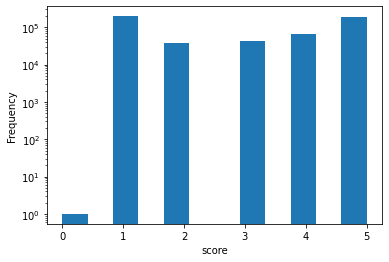

In [4]:
df['score'].plot.hist(log=True, bins=12)
plt.xlabel('score')
plt.show()

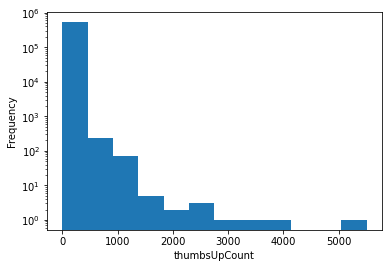

In [5]:
df['thumbsUpCount'].plot.hist(log=True, bins=12)
plt.xlabel('thumbsUpCount')

plt.show()

In [6]:
z = df.groupby("score")
z.median()

,thumbsUpCount
score,
0,0
1,0
2,0
3,0
4,0
5,0


In [7]:
pivot = df.pivot_table(index =['score'], values =['thumbsUpCount'], aggfunc ={'std', 'mean'})
pivot

thumbsUpCount           
               mean        std
score                         
0          0.000000        NaN
1          3.109267  35.898195
2          3.026881  30.897086
3          1.541281  20.741555
4          0.869139  22.961987
5          0.322223  11.249789

<AxesSubplot:xlabel='score', ylabel='Thumbs up'>

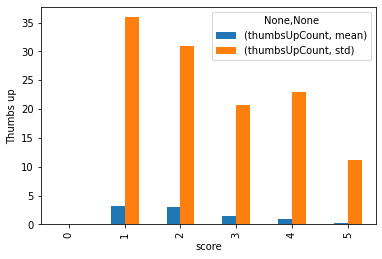

In [8]:
pivot.plot(kind='bar', ylabel = 'Thumbs up')

## Analysis

From my analysis of the data, most review score have zero thumbs up. So I dived deeper to analyze what is the mean and standard deviation of thumbs up number for each score. The result is that the higher the score, the lower the average thumbs up, and the lower the standard deviationa with exception for the score 4. This exception might indicate that people tend to enjoy a score of 4 than score of 3 or 5. The decreasing in average and standard deviation number of thumbs up count for higher score can also indicate that people enjoy giving a lower score.